# Multilingual CLIP

## Install Requirements and Download OpenAI CLIP Model
This section might take some minutes.

In [ ]:
import subprocess
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

%pip install matplotlib
%pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
%pip install ftfy==5.8
%pip install transformers

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

import warnings
warnings.filterwarnings("ignore")

# %pip install git+https://github.com/openai/CLIP.git
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
# import clip


In [ ]:
!git clone https://github.com/mohammad-albarham/Multilingual-CLIP.git
%cd Multilingual-CLIP
!pip install -e .

### Load The Multilingual Text Encoder

In [ ]:
# from multilingual_clip import pt_multilingual_clip
# import transformers

# model_name = 'M-CLIP/M-BERT-Distil-40'

# text_model = pt_multilingual_clip.MultilingualCLIP.from_pretrained(model_name)
# tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)



# from multilingual_clip import pt_multilingual_clip
# import transformers

# # texts = [
# #     'تفاحة حمراء',
# # ]
# model_name = 'pain/bert-base-arabertv2-Vit-B-32-using-tf_3'

# text_model = pt_multilingual_clip.MultilingualCLIP.from_pretrained(model_name)
# tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

# embeddings = model.forward(texts, tokenizer)
# print(embeddings.shape)

In [ ]:
# Tensorflow checkpoint

# import transformers

# # def tf_example(texts, model_name='pain/bert-base-arabertv2-Vit-B-32-without-partial-without-pytorch-checkpoint'):
# from multilingual_clip import tf_multilingual_clip

# model_name='pain/bert-base-arabertv2-Vit-B-32-without-partial-without-pytorch-checkpoint'

# text_model = tf_multilingual_clip.MultiLingualCLIP.from_pretrained(model_name)
# tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

# inData = tokenizer.batch_encode_plus(arbic_captions, return_tensors='tf', padding=True)
# embeddings = text_model(inData)
# print(embeddings.shape)
# # return embeddings

# # embeddings = tf_example(texts)

In [ ]:
# !pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

import warnings
warnings.filterwarnings("ignore")

In [4]:
from multilingual_clip.TeacherLearning import TrainingModel
import transformers
import pickle
import tensorflow as tf
# Ignore the warning messages
import logging
logging.getLogger("transformers.modeling_tf_utils").setLevel(logging.ERROR)


# # def splitAndStoreTFModelToDisk(transformerBase, weightsPath, visualDimensionSpace, saveNameBase):

# weightsPath = '/home/lenovo/Desktop/testing_arabic_clip/content/bert-base-arabertv2-Vit-B-32'
# transformerBase = 'aubmindlab/bert-base-arabertv2'
# modelSaveBase = 'arabic-arabert-Vit-B-32'
# visualDimensionSpace = 512

# tokenizer = transformers.AutoTokenizer.from_pretrained(transformerBase)
# model = TrainingModel.SentenceModelWithLinearTransformation(transformerBase, visualDimensionSpace)

# model.load_weights(weightsPath)


### Load The Matching CLIP Model

In [5]:
# clip_model, compose = clip.load('RN50x4')

# input_resolution = clip_model.visual.input_resolution
# context_length = clip_model.context_length
# vocab_size = clip_model.vocab_size

# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
# print("Input resolution:", input_resolution)
# print("Context length:", context_length)
# print("Vocab size:", vocab_size)

In [6]:
# clip_model, compose = clip.load('RN50x4')

# input_resolution = clip_model.visual.input_resolution
# context_length = clip_model.context_length
# vocab_size = clip_model.vocab_size

# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
# print("Input resolution:", input_resolution)
# print("Context length:", context_length)
# print("Vocab size:", vocab_size)

In [7]:
# !git clone https://github.com/openai/CLIP.git

In [8]:
# from CLIP_main import clip
# clip_model = clip.load("ViT-B/32")
# len(clip_model)

In [9]:
import torch
from CLIP_main import clip
import requests
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# image = preprocess(image).unsqueeze(0).to(device)

# with torch.no_grad():
#     image_features = model.encode_image(image)

# print("Image features shape:", image_features.shape)
input_resolution = clip_model.visual.input_resolution
context_length = clip_model.context_length
vocab_size = clip_model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Device:  cuda
Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


### Read in the Images

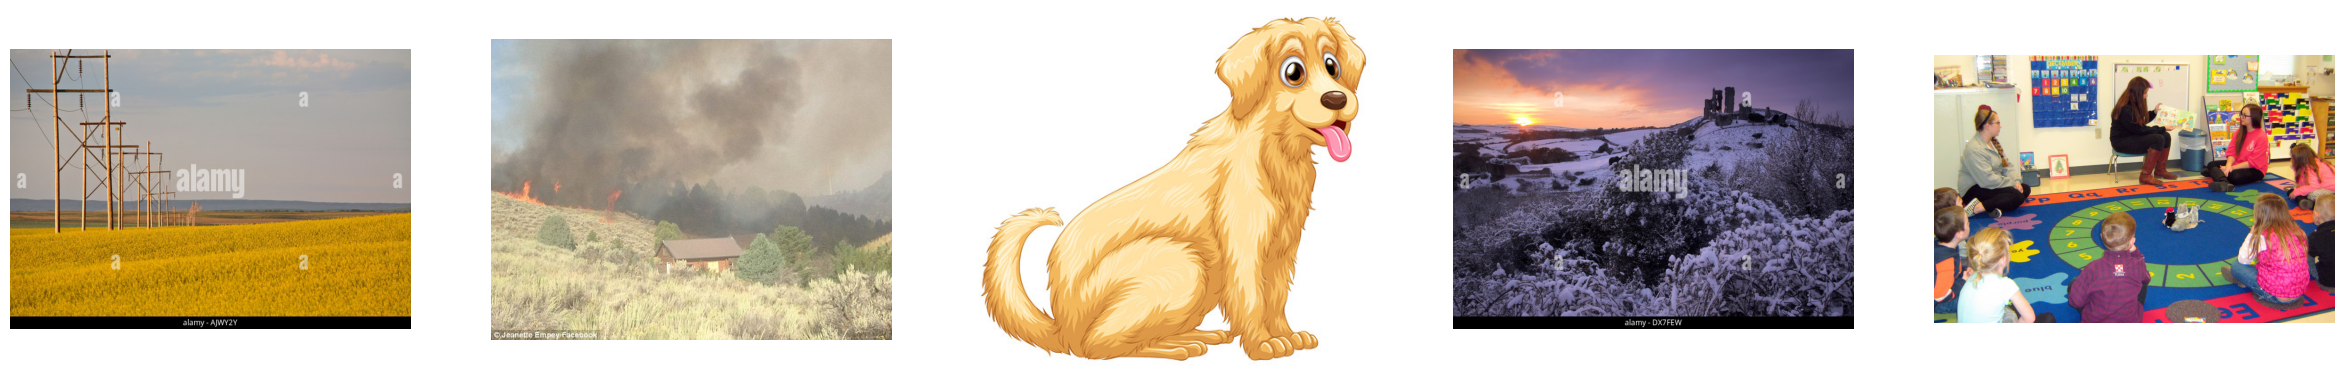

In [126]:
main_path = '/home/lenovo/Desktop/testing_arabic_clip/Multilingual-CLIP/Images/' #Multilingual-CLIP/Images/'
demo_images = {
    # 'Green Apple': 'green apple.jpg',
    # 'Red Apple': 'red apple.jpg',
    # 'Purple Apple': 'purple apple.png',
    # 'Orange Apple': 'Orange Apple.png',
    # 'Fruit Bowl': 'fruit bowl.jpg',
    # 'Bananas on Tree': 'bananas.jpg',
    'image_1': 'askatchewan.jpg',
    'image_2': 'fire.jpg',
    'image_3': 'dog.jpg',
    'image_4': 'sun.jpg',
    'image_5': 'reading.jpg'
}
images = {name: Image.open(main_path + p) for name, p in demo_images.items()}

fig = plt.figure()
fig.set_size_inches(30,5)
for i, img in enumerate(images.values()):
  a=fig.add_subplot(1,len(images), i+1)
  plt.imshow(img, )
  plt.axis('off')

### Create Captions

In [127]:
# russan_captions = [
#     'Зеленое яблоко', 'Красное яблоко', 'Фиолетовое яблоко', 'Апельсиновое яблоко', 'Миска с фруктами', 'Гроздь бананов свисает с дерева'
# ]

# french_captions = [
#   'Une pomme verte', 'Une pomme rouge', 'Une pomme violette', 'Une pomme orange', 'Un bol rempli de fruits', 'Un tas de bananes pendu à un arbre'
# ]

# german_captions = [
#   'Ein grüner Apfel', 'Ein roter Apfel', 'Ein lila Apfel', 'Ein orangefarbener Apfel', 'Eine Schüssel voller Früchte', 'Ein Bündel Bananen hängt an einem Baum'
# ]

# spanish_captions = [
#     'Una manzana verde', 'Una manzana roja', 'Una manzana de color lila', 'Una manzana de color naranja', 'Un frutero lleno de fruta', 'Un racimo de bananas colgados de un banano',
# ]

# greek_captions = [
#     'Ένα πράσινο μήλο', 'Ένα κόκκινο μήλο', 'Ένα μοβ μήλο', 'Ένα πορτοκαλί μήλο', 'Ένα μπολ γεμάτο με φρούτα', 'Ένα τσαμπί μπανάνες κρεμάμενες από ένα δέντρο',
# ]

# swedish_captions = [
#   'Ett grönt äpple', 'Ett rött äpple', 'Ett lila äpple', 'Ett oranget äpple', 'En skål fylld med frukt', 'En klase bananer som hänger från ett träd'
# ]


# arbic_captions = [
#   'رجل على دراجة', 'تفاحة' #  'قطار', # 'تفاحة برتقالية', 'وعاء فاكهة', 'الموز على الشجرة'
# ]

# arbic_captions = [
#   "رجل في السينما مع الفشار وهاتف خلوي", "خطوط الكهرباء تمتد فوق حقل كانولا"
# ]

# arbic_captions = [
#   'تفاحة خضراء', 'تفاحة حمراء', 'تفاحة بنفسجية', 'تفاحة برتقالية', 'وعاء فاكهة', 'الموز على الشجرة'
# ]

arbic_captions = [
'خطوط الكهرباء تمتد فوق حقل كانولا',
'بيت محترق في حقل قريب من نار',
'جرو مبتسم يجلس على حامل أسهم أبيض',
'الشمس تشرق فوق القلعة',
'الطلاب الجالسون على الأرض في فصل دراسي'
]

all_captions = {'Arabic': arbic_captions}
# all_captions = {'Russian': russan_captions, 'French': french_captions, 'German': german_captions,
#                 'Spanish': spanish_captions, 'Greek': greek_captions, 'Swedish': swedish_captions
#                 }

### Prepare Images for CLIP

In [128]:
img_input = torch.stack([preprocess(img).to('cuda:0') for img in images.values()])

### Generate Text & Vision Embeddings

In [129]:
import torch

# Assuming you have a model named 'model'
device = next(clip_model.parameters()).device
print("device: ", device)
if device.type == 'cuda':
    print("Model is running on GPU.")
else:
    print("Model is running on CPU.")

device:  cuda:0
Model is running on GPU.


In [130]:
# inData = tokenizer.batch_encode_plus(arbic_captions, return_tensors='tf', padding=True)
# inData
# len(inData)

In [131]:
# ids = inData["input_ids"]
# att = inData["attention_mask"]

# input_edited = ids, att

# model.call(inData)

In [132]:
# !pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 --index-url https://download.pytorch.org/whl/cu117

In [133]:
# import pickle

# head_weight_path = '/home/lenovo/Desktop/testing_arabic_clip/content/Swedish-2M Linear Weights.pkl'# '/home/lenovo/Desktop/testing_arabic_clip/content/arabic-arabert-Vit-B-32-Linear-Weights.pkl'

# with open(head_weight_path, 'rb') as f:
#     lin_weights = pickle.loads(f.read())
# print("Contents of lin_weights:", lin_weights)  # Add this line
# # self.clip_head.weight = torch.nn.Parameter(torch.tensor(lin_weights[0]).float().t())
# # self.clip_head.bias = torch.nn.Parameter(torch.tensor(lin_weights[1]).float())


In [134]:
from multilingual_clip.legacy_multilingual_clip import MultilingualClip

model_path = 'pain/arabic-arabert-Vit-B-32-Transformer-tf' #  'pain/bert-base-arabertv2-Vit-B-32-using-tf_3' # 'pain/bert-base-arabertv2-Vit-B-32' # pain/bert-base-arabertv2-Vit-B-32-using-tf_3
tok_path =  'pain/arabic-arabert-Vit-B-32-Transformer-tf' # 'pain/bert-base-arabertv2-Vit-B-32-using-tf_3' # 'pain/bert-base-arabertv2-Vit-B-32'
# head_weight_path = '/home/lenovo/Desktop/testing_arabic_clip/content/arabic-arabert-Vit-B-32-Linear-Weights.pkl'
head_weight_path = '/home/lenovo/Desktop/arabic_clip/Multilingual-CLIP/multilingual_clip/TeacherLearning/multiple_checkpoints/postTransformation_layer_linear_latest.pickle'

sweclip_args = {'model_name': model_path,
                'tokenizer_name': tok_path,
                'head_name': head_weight_path}

sweclip = MultilingualClip(**sweclip_args)

# print(sweclip('test').shape)

cuda:0


All TF 2.0 model weights were used when initializing BertModel.

All the weights of BertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [135]:
with torch.no_grad():
    image_embs = clip_model.encode_image(img_input).float().to('cpu')

    language_embs = {}
    for lang, captions in all_captions.items():
      # tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
      # inData = tokenizer.batch_encode_plus(captions, return_tensors='tf', padding=True)
      # # embeddings = model(inData)
      # ids = inData["input_ids"]
      # att = inData["attention_mask"]

      # input_edited = ids, att

      language_embs[lang] = sweclip(captions) # text_model(captions,tokenizer)
      # language_embs[lang] = clip_model.forward(captions, tokenizer)
      print("Text features shape:", language_embs[lang].shape)

print("CLIP-Vision: {}".format(image_embs.shape))
for lang, embs in language_embs.items():
  print("{}: {}".format(lang, embs.shape))

Text features shape: torch.Size([5, 512])
CLIP-Vision: torch.Size([5, 512])
Arabic: torch.Size([5, 512])


### Compare Predictions

Compare the Cosine-Similarities between the image embeddings and the different language embeddings.

In [136]:
language_embs.items()

dict_items([('Arabic', tensor([[-0.0947,  0.1187, -0.0383,  ..., -0.2340, -0.1004,  0.2304],
        [-0.0334, -0.1609,  0.1007,  ...,  0.0464, -0.0886, -0.0380],
        [-0.0341,  0.1124,  0.1234,  ...,  0.2364,  0.0166, -0.2842],
        [ 0.2051,  0.1458, -0.0687,  ..., -0.0666, -0.3327, -0.0718],
        [ 0.0731, -0.0367, -0.0756,  ...,  0.3002, -0.0420,  0.1755]]))])

In [137]:
import tensorflow as tf

def compare_embeddings(logit_scale, img_embs, txt_embs):
  # normalized features
  image_features = img_embs / img_embs.norm(dim=-1, keepdim=True)
  print(type(txt_embs))

  # Calculate the norm along a specific dimension with keepdim=True
  dim = -1  # The dimension along which you want to calculate the norm
  keepdim = True  # Keep the dimension after the operation
  # norm = tf.norm(tensor, ord='euclidean', axis=dim, keepdims=keepdim)

  text_features = txt_embs / tf.norm(txt_embs, ord='euclidean', axis=dim, keepdims=keepdim) # txt_embs.norm(dim=-1, keepdim=True)

  # cosine similarity as logits
  # logits_per_image = logit_scale * image_features @ text_features.t()
  logits_per_image = logit_scale * tf.matmul(image_features, tf.transpose(text_features))
  # logits_per_text = logit_scale * text_features @ image_features.t()

  logits_per_text = logit_scale * tf.matmul(text_features, tf.transpose(image_features))

  # shape = [global_batch_size, global_batch_size]
  return logits_per_image, logits_per_text

# CLIP Temperature scaler
logit_scale = clip_model.logit_scale.exp().float().detach().cpu().numpy()
# logit_scale = clip_model.logit_scale.exp().float().detach().cpu().numpy()

language_logits = {}
for lang, embs in language_embs.items():
  language_logits[lang] = compare_embeddings(logit_scale, image_embs, embs)

<class 'torch.Tensor'>


### Visualize Results

Here we will not visualize the results, so that every column is the Softmax distribution over all the texts for the respective image.

Language: Arabic


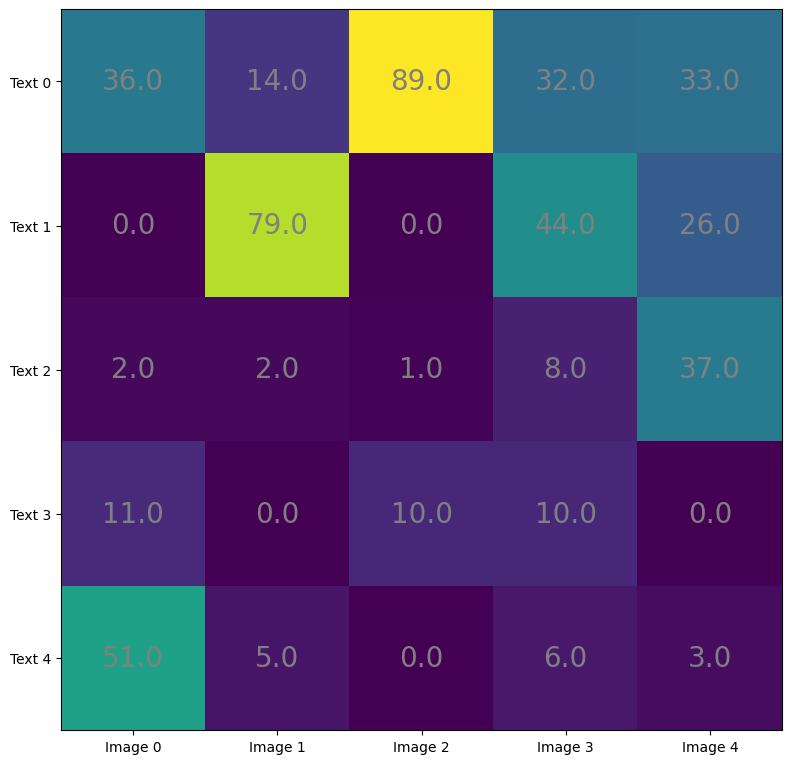

In [138]:
def plot_heatmap(result_matrix):
  height, width = result_matrix.shape
  fig, ax = plt.subplots()
  fig.set_size_inches(8,8)
  im = ax.imshow(result_matrix)



  # Create X & Y Labels
  ax.set_xticks(np.arange(width))
  ax.set_yticks(np.arange(height))
  ax.set_xticklabels(["Image {}".format(i) for i in range(width)])
  ax.set_yticklabels(["Text {}".format(i) for i in range(height)])

  for i in range(height):
    for j in range(width):
        text = ax.text(j, i, result_matrix[i, j],
                       ha="center", va="center", color='grey', size=20)

  fig.tight_layout()
  plt.show()

# for lang, (img_logits, txt_logits) in language_logits.items():
#   # Convert Logits into Softmax predictions
#   probs = img_logits.softmax(dim=-1).cpu().detach().numpy()

#   # Transpose so that each column is the softmax for each picture over the texts
#   probs = np.around(probs, decimals=2).T * 100

#   print("Language: {}".format(lang))
#   plot_heatmap(probs)


for lang, (img_logits, txt_logits) in language_logits.items():
  # Convert Logits into Softmax predictions
  probs = tf.nn.softmax(img_logits, axis=-1).numpy()

  # Transpose so that each column is the softmax for each picture over the texts
  probs = np.around(probs, decimals=2).T * 100

  print("Language: {}".format(lang))
  plot_heatmap(probs)

## Conclusion
Although the diagonal is not completely maxed out, all languages managed to correctly classify all images. Interestingly, all languages had an easier time classifying the purple apple which was photoshopped than the red apple.